### Imports

In [79]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime


## Useful expressions and functions

In [4]:
DATA_FOLDER = '../data_clean'
# Precomputed regular expression to check if a column is corresponding to a date
IS_DATE = re.compile("^[1-2]{1}[0-9]{3}$")

In [5]:
def describeDf(df,name="DESCRIPTION",level=1):
    """
    Describe the data. Different levels are possible.
    Level 0: Name the different columns
    Level 1: Explore the values of each column
    """
    # Print a header
    print("______________________________ " + name+" ______________________________\n")
    
    date = []
    
    # For level 1
    if(level==1):
        print("\n")
        # Go through the columns
        for col in df.columns:
            # Explore and print the unique values of columns not corresponding to a date
            if((not IS_DATE.match(col)) & (not re.compile("[0-9]+ an").match(col))):
                # Header
                print("         ATTRIBUTE: "+col)
                # Values in the columns
                print("   "+str(df[col].unique()))
                print("\n")
            else:
                date.append(col)
        # Print the dates columns
        print("         VALUES: "+str(date))
        print("\n\n\n")
    # For level 0
    elif(level==0) :
        print(df.columns.values)
        print("\n\n\n")
    # Raise an error if the level value doesn't exist
    else:
        raise NotImplementedError

## Load and describe the data

In [33]:
print("Dataframes available:\n\n")
for file in os.listdir(DATA_FOLDER):
    filename = os.fsdecode(file)
    tablename = "df_"+os.path.splitext(os.path.splitext(filename)[0])[0]
    globals()[tablename] = pd.read_csv(DATA_FOLDER + '/' + filename)
    try:
        globals()[tablename] = globals()[tablename].drop(columns=['Unnamed: 0'])
    except:
        pass
    describeDf(globals()[tablename], name=tablename,level=0)
    

Dataframes available:


______________________________ df_Qualite_vie_agglo ______________________________

['agglo_index' 'agglo' 'type_index' 'type' '2011' '2012' '2013' '2014']




______________________________ df_Depense_menages_canton ______________________________

['annee' 'Canton' 'Mode' 'Eaux-de-vie' 'Vins' 'Bières'
 'Boissons alcoolisées dans les restaurants, cafés et bars'
 'Boissons alcoolisées en petite restauration'
 'Boissons alcoolisées dans les cantines'
 "Boissons alcoolisées chez des privés lors d'invitations" 'Automobiles'
 'Motos, scooters et vélomoteurs' 'Vélos' 'Carburants et lubrifiants'
 'Train, billets et abonnements' 'Tram, billets et abonnements'
 'Bus, billets et abonnements' 'Bateau, billets et abonnements'
 'Transport multimodal' 'Services de téléphonie mobile'
 'Assurance véhicule']




______________________________ df_hacked_accident ______________________________

['id' 'localisation' 'roadtype' 'severitycategory' 'accidentyear'
 'accidenttype' 'fsoc

### Evolution of the victims in time

For three different gravities and road types, we plot the evolution in time of the number of victims. We plot only the cantons that had the most victims in 1992 ("number_cantons_to_plot" of them)

In [76]:
def plot_dataframe(x, y, title, xlabel, ylabel, labels, number_to_plot=None):  
    plt.figure(figsize=(12,7))
    plt.title(title, fontsize=23)
    for j in range(number_to_plot):
        plt.plot(x, y.iloc [j], label = labels[j])
    plt.legend(fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.show()

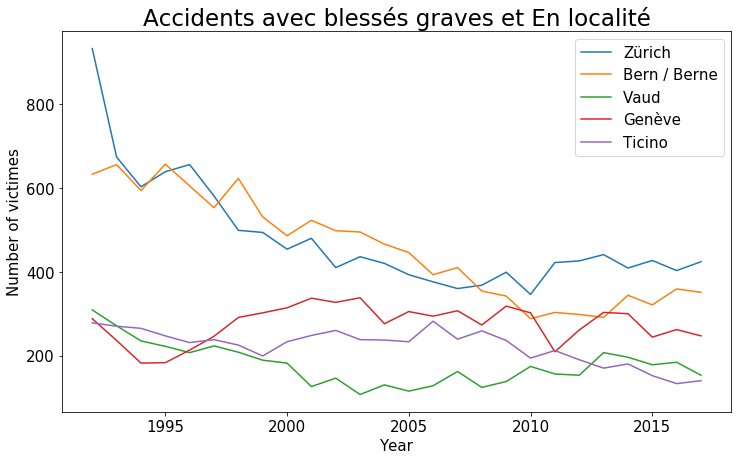

In [77]:
# Number of cantons to plot
number_cantons_to_plot = 5

# Get the information interesting us
victimes_cantons = df_Accident_cantons.drop(columns = \
                            (['canton_index', 'gravite_index', 'ruralite_index']))[:-1]

# Group the accidents by gravity and road type and get the top cantons
victimes_gravite_ruralite = victimes_cantons.groupby(['gravite','ruralite'])\
.apply(lambda x: x.nlargest(number_cantons_to_plot,'1992'))


title = victimes_gravite_ruralite.iloc[0,1]+' et '+victimes_gravite_ruralite.iloc[0,2]
xlabel = 'Year'
ylabel = 'Number of victimes'
x = np.arange(1992,2018,1)
y = victimes_gravite_ruralite.iloc[:number_cantons_to_plot,3:]
labels = victimes_gravite_ruralite.iloc[:number_cantons_to_plot,0]
plot_data(x, y, title, xlabel, ylabel, labels, number_to_plot=number_cantons_to_plot)

In [73]:
labels[0]

'Zürich'

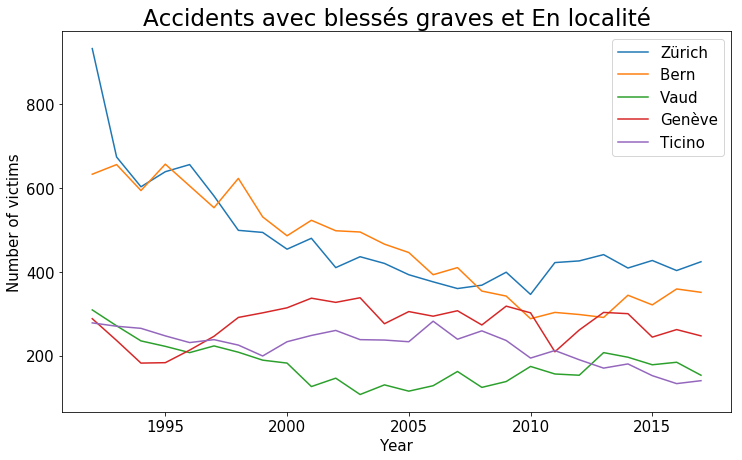

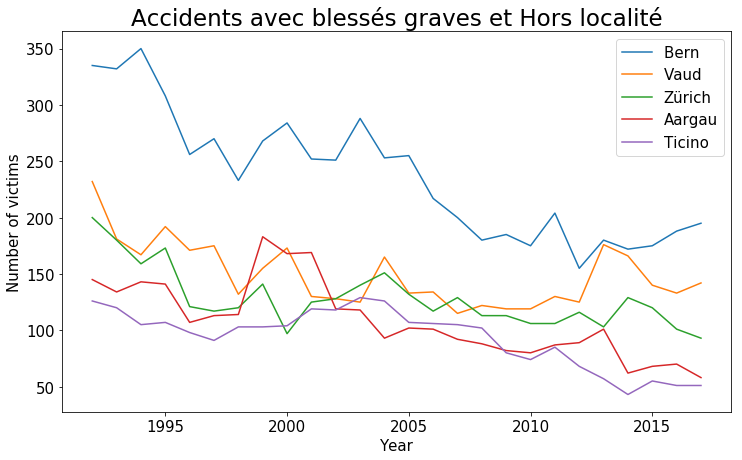

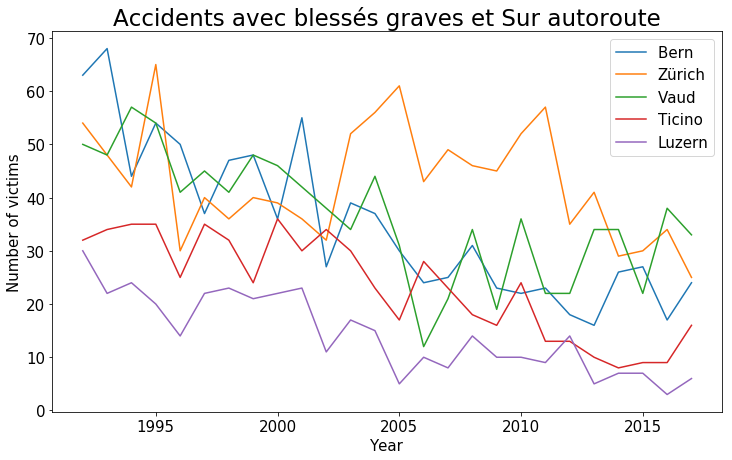

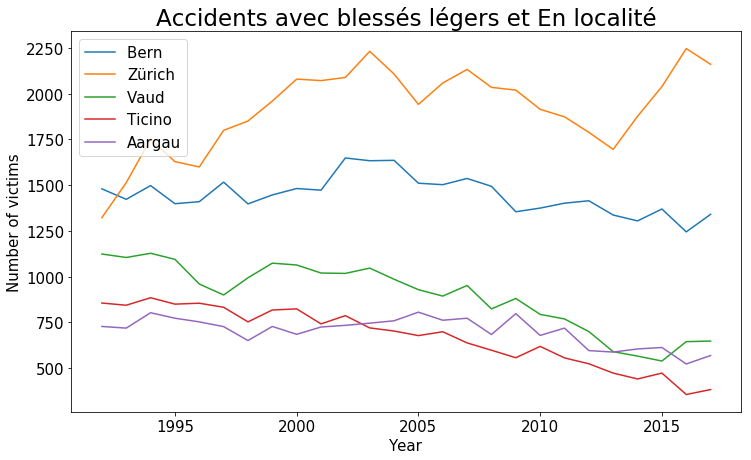

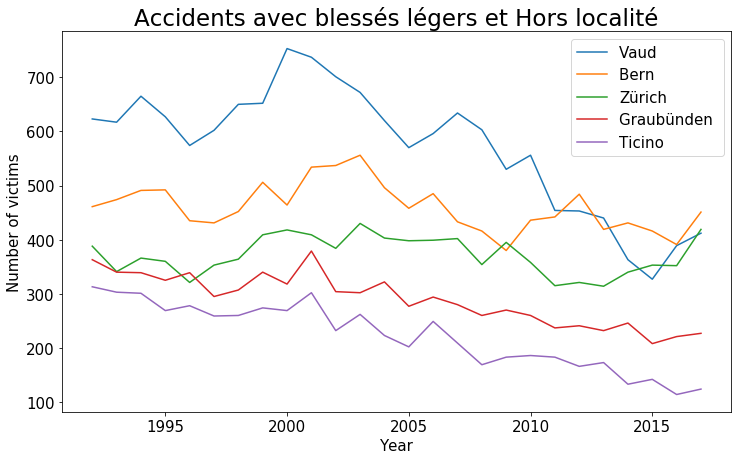

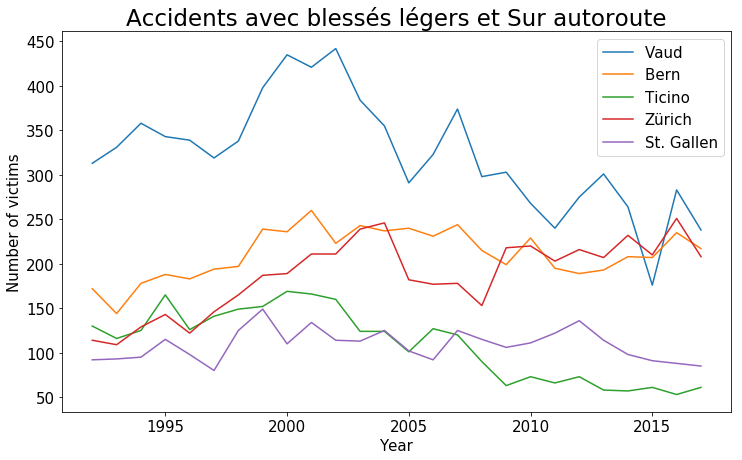

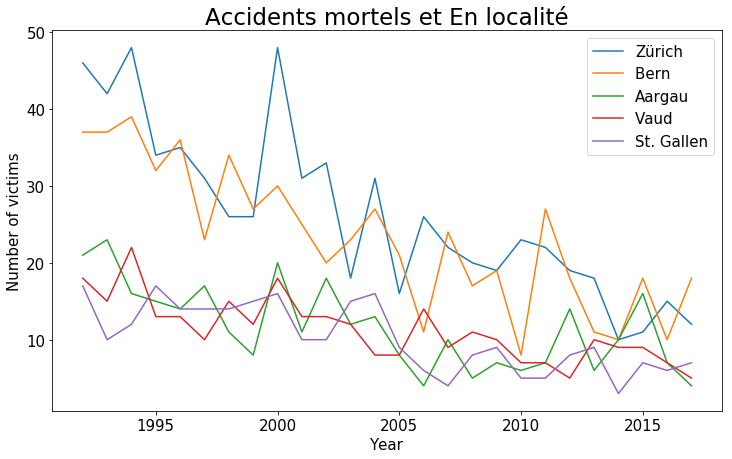

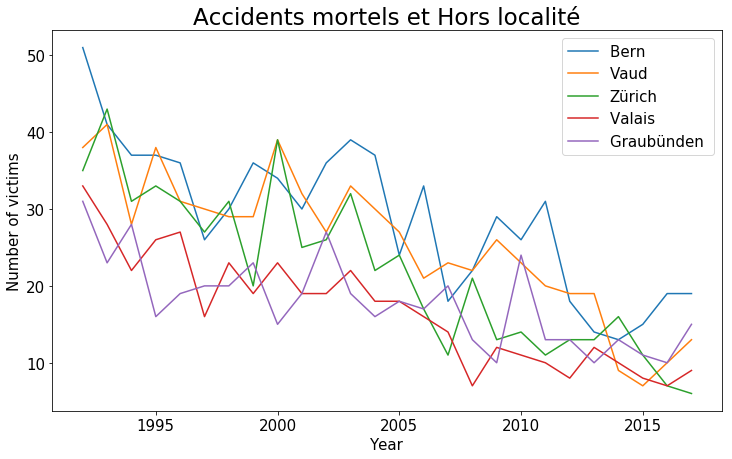

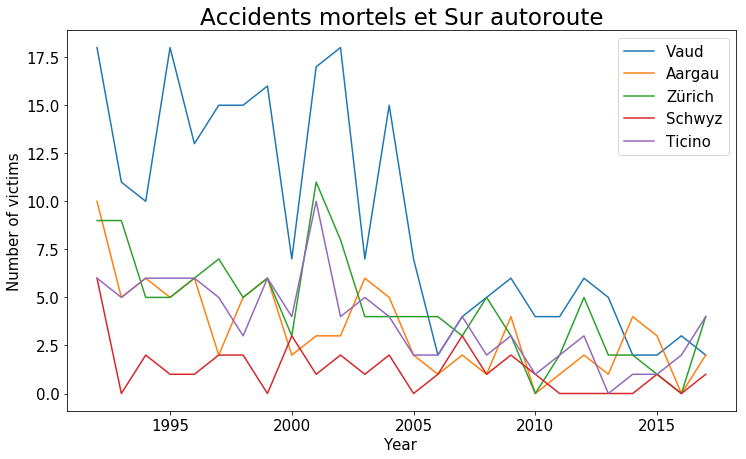

In [35]:
# Number of cantons to plot
number_cantons_to_plot = 5

# Get the information interesting us
victimes_cantons = df_Accident_cantons.drop(columns = \
                            (['canton_index', 'gravite_index', 'ruralite_index']))[:-1]

# Group the accidents by gravity and road type and get the top cantons
victimes_gravite_ruralite = victimes_cantons.groupby(['gravite','ruralite'])\
.apply(lambda x: x.nlargest(number_cantons_to_plot,'1992'))

# Plot them
for i in range(9):
    plt.figure(figsize=(12,7))
    plt.title(victimes_gravite_ruralite.iloc[i*number_cantons_to_plot,1]+\
              ' et '+victimes_gravite_ruralite.iloc[i*number_cantons_to_plot,2],\
              fontsize=23)
    for j in range(number_cantons_to_plot):
        plt.plot(np.arange(1992,2018,1),\
                 victimes_gravite_ruralite.iloc[number_cantons_to_plot*i+j][3:],\
                 label=victimes_gravite_ruralite.iloc[number_cantons_to_plot*i+j,0]\
                 .partition('/')[0])
    plt.legend(fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Number of victims', fontsize=15)
    plt.show()

### Evolution of the number of victims by gravity

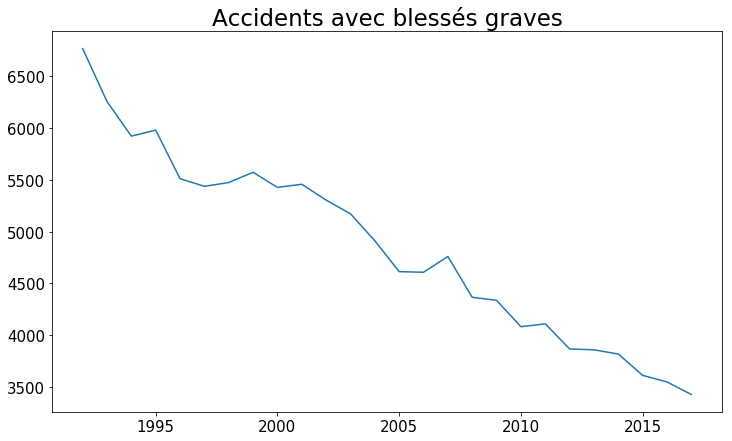

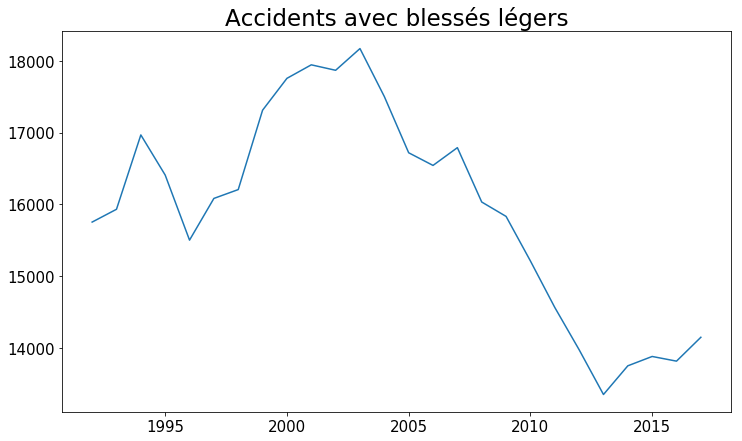

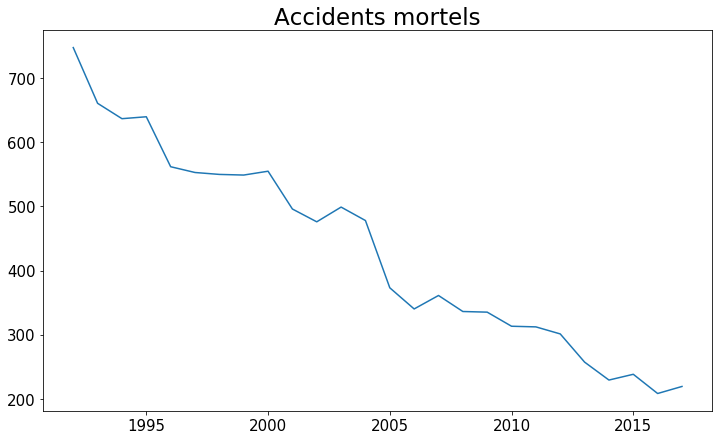

In [7]:
# Group the accidents by gravity 
victimes_gravite = victimes_cantons.groupby(['gravite']).sum()

for i in range(3):
    plt.figure(figsize=(12,7))
    plt.plot(np.arange(1992,2018,1),victimes_gravite.iloc[i])
    plt.title(victimes_gravite.index[i], fontsize=23)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

### Evolution of the number of victims by road type

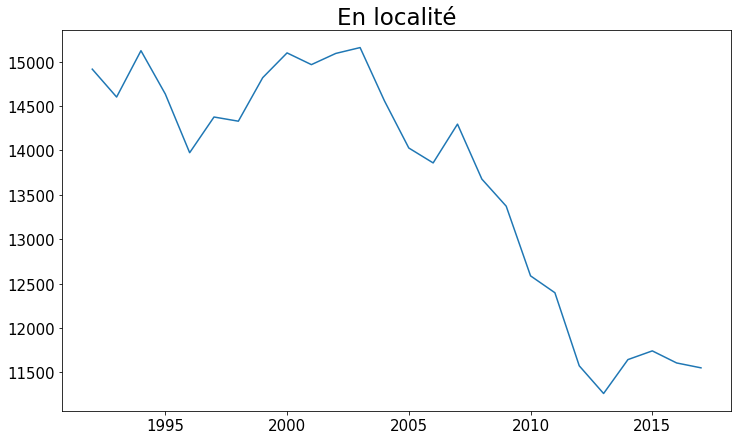

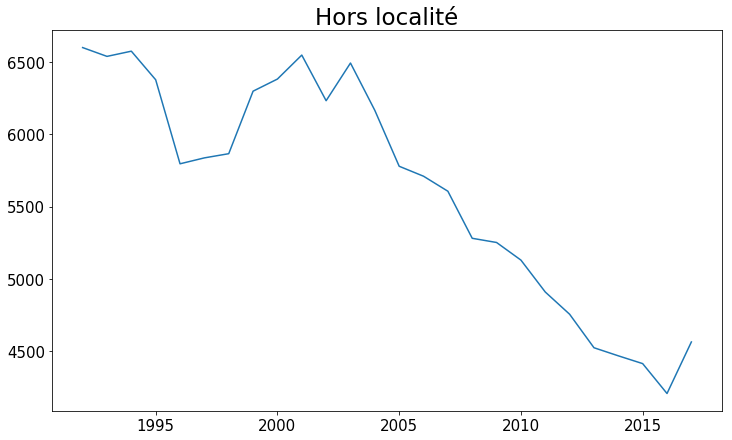

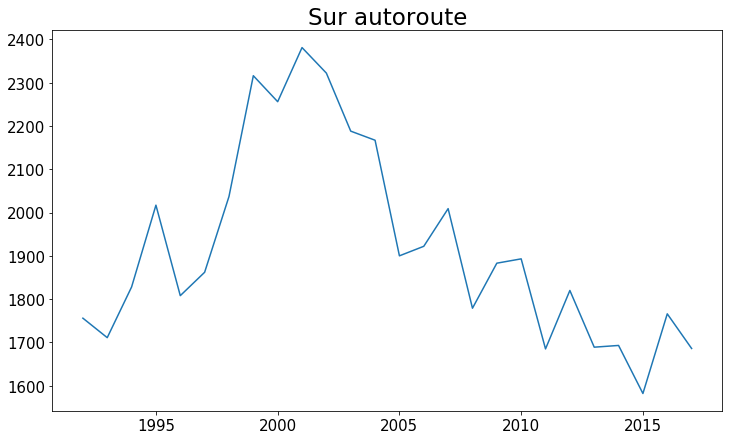

In [8]:
# Group the accidents by gravity 
victimes_ruralite = victimes_cantons.groupby(['ruralite']).sum()

for i in range(3):
    plt.figure(figsize=(12,7))
    plt.plot(np.arange(1992,2018,1),victimes_ruralite.iloc[i])
    plt.title(victimes_ruralite.index[i], fontsize=23)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

#### Total victimes

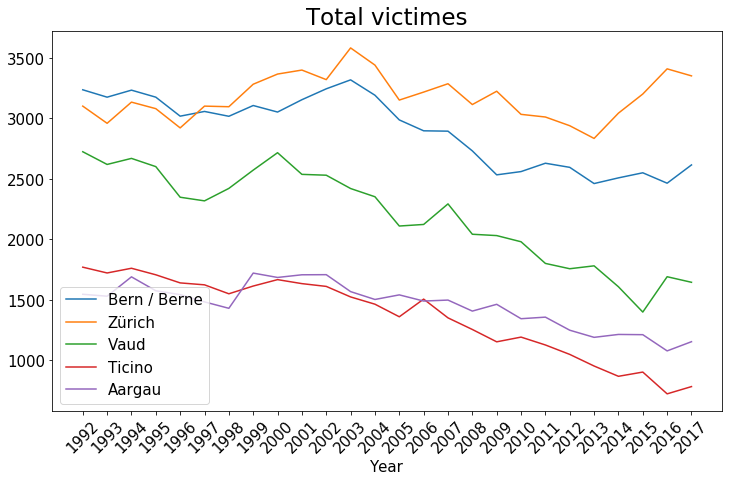

In [9]:
victimes_cantons = victimes_cantons.groupby('canton').sum().sort_values('1992', ascending=False)

plt.figure(figsize=(12,7))
for i in range(number_cantons_to_plot):
    plt.plot(victimes_cantons.columns,victimes_cantons.iloc[i], label= victimes_cantons.index[i])
    plt.title('Total victimes', fontsize=23)
    plt.xticks(fontsize=15, rotation=45)
    plt.yticks(fontsize=15)
    plt.xlabel('Year', fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Depenses linked to road and road security

In [10]:
frais = df_Frais_routes_cantonales
frais['Routes'] = frais[['Constructions', 'Amélio-', 'Entretien Construction',\
                         'Entretien Exploitation']].sum(axis=1)
frais['Somme'] = frais[['Routes', 'Surveillance Policiere']].sum(axis=1)
frais = frais.drop(columns = ['Administration', 'Acquisition', 'Constructions',\
                              'Amélio-', 'Entretien Construction', 'Entretien Exploitation',\
                              'Total'])
frais = frais[(frais['canton']!='Total') & (frais['canton']!='Espace Mittelland')\
              & (frais['canton']!='Suisse du Nord-Ouest') & (frais['canton']!='Région lémanique')\
              & (frais['canton']!='Suisse centrale') & (frais['canton']!='Zentralschweiz')]
frais.head()

,annee,canton,Surveillance Policiere,Routes,Somme
0,1994,Appenzell Rh.-Ext.,2915,26800,29715
1,1994,Appenzell Rh.-Int.,527,2791,3318
2,1994,Argovie,4917,87894,92811
3,1994,Berne,30654,137603,168257
4,1994,Bâle-Campagne,10638,74443,85081


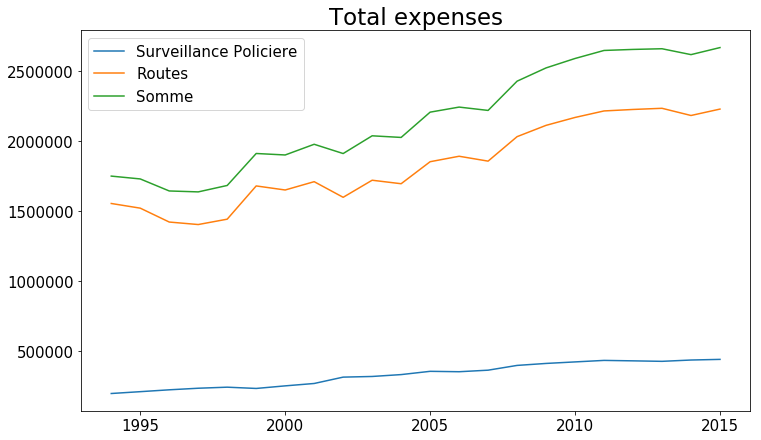

In [11]:
frais_annee = frais.groupby(['annee']).sum()

plt.figure(figsize=(12,7))
for col in frais_annee.columns:
    plt.plot(frais_annee.index,frais_annee[col], label=col)
    plt.title('Total expenses', fontsize=23)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Correlation with total expenses

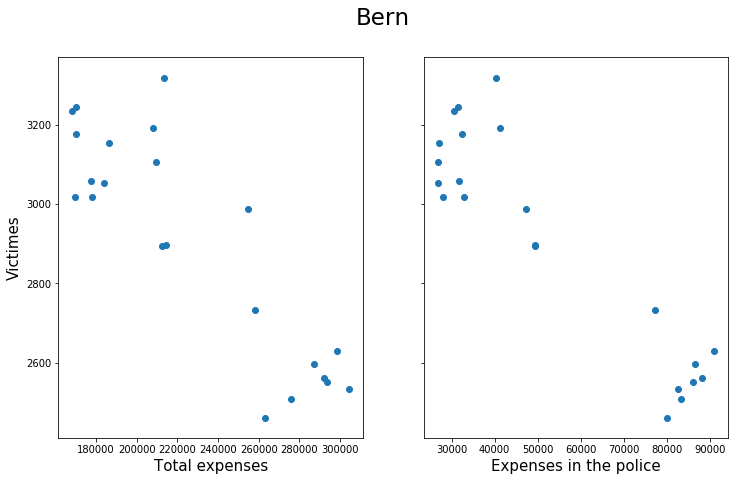

In [12]:
# From 1994 to 2015
victimes_bern = victimes_cantons.loc['Bern / Berne'][2:-2]
frais_bern = frais[frais['canton']=='Berne']

victimes_zurich = victimes_cantons.loc['Zürich'][2:-2]
frais_zurich = frais[frais['canton']=='Zurich']

victimes_vaud = victimes_cantons.loc['Vaud'][2:-2]
frais_vaud = frais[frais['canton']=='Vaud']

victimes_uri = victimes_cantons.loc['Uri'][2:-2]
frais_uri = frais[frais['canton']=='Uri']

victimes_ticino = victimes_cantons.loc['Ticino'][2:-2]
frais_ticino = frais[frais['canton']=='Tessin']

victimes_aargau = victimes_cantons.loc['Aargau'][2:-2]
frais_aargau = frais[frais['canton']=='Argovie']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True)

ax1.scatter(frais_bern['Somme'], victimes_bern)
ax1.set_xlabel('Total expenses', fontsize=15)
ax1.set_ylabel('Victimes', fontsize=15)

ax2.scatter(frais_bern['Surveillance Policiere'], victimes_bern)
ax2.set_xlabel('Expenses in the police', fontsize=15)

plt.suptitle('Bern', fontsize=23)
plt.show()

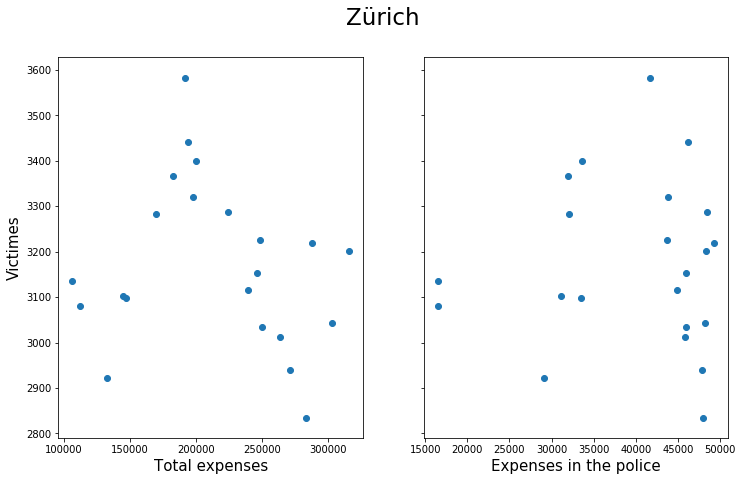

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True)

ax1.scatter(frais_zurich['Somme'], victimes_zurich)
ax1.set_xlabel('Total expenses', fontsize=15)
ax1.set_ylabel('Victimes', fontsize=15)

ax2.scatter(frais_zurich['Surveillance Policiere'], victimes_zurich)
ax2.set_xlabel('Expenses in the police', fontsize=15)

plt.suptitle('Zürich', fontsize=23)
plt.show()

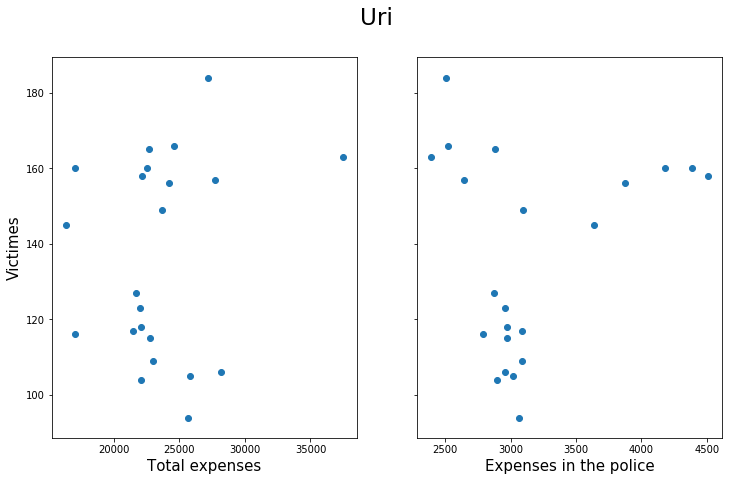

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True)

ax1.scatter(frais_uri['Somme'], victimes_uri)
ax1.set_xlabel('Total expenses', fontsize=15)
ax1.set_ylabel('Victimes', fontsize=15)

ax2.scatter(frais_uri['Surveillance Policiere'], victimes_uri)
ax2.set_xlabel('Expenses in the police', fontsize=15)

plt.suptitle('Uri', fontsize=23)
plt.show()

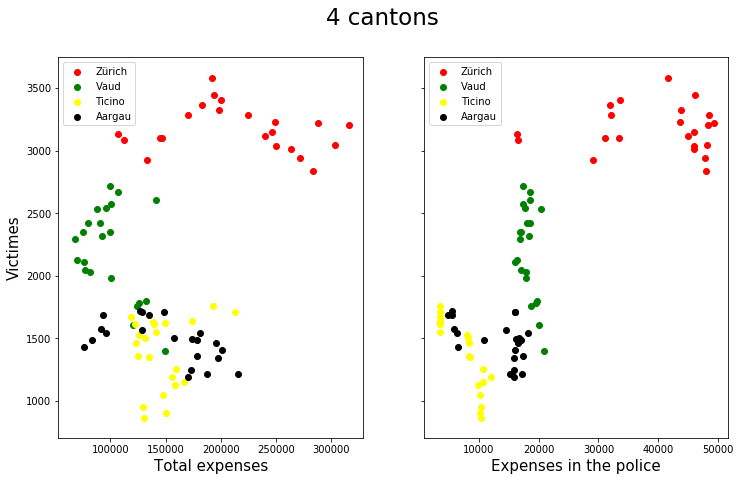

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True)

#ax1.scatter(frais_bern['Somme'], victimes_bern, c='Blue', label='Bern')
ax1.scatter(frais_zurich['Somme'], victimes_zurich, c='Red', label='Zürich')
ax1.scatter(frais_vaud['Somme'], victimes_vaud, c='Green', label='Vaud')
ax1.scatter(frais_ticino['Somme'], victimes_ticino, c='Yellow', label='Ticino')
ax1.scatter(frais_aargau['Somme'], victimes_aargau, c='Black', label='Aargau')
ax1.set_xlabel('Total expenses', fontsize=15)
ax1.set_ylabel('Victimes', fontsize=15)
ax1.legend()

#ax2.scatter(frais_bern['Surveillance Policiere'], victimes_bern, c='Blue', label='Bern')
ax2.scatter(frais_zurich['Surveillance Policiere'], victimes_zurich, c='Red', label='Zürich')
ax2.scatter(frais_vaud['Surveillance Policiere'], victimes_vaud, c='Green', label='Vaud')
ax2.scatter(frais_ticino['Surveillance Policiere'], victimes_ticino, c='Yellow', label='Ticino')
ax2.scatter(frais_aargau['Surveillance Policiere'], victimes_aargau, c='Black', label='Aargau')
ax2.set_xlabel('Expenses in the police', fontsize=15)
ax2.legend()

plt.suptitle('4 cantons', fontsize=23)
plt.legend()
plt.show()

Double correlation kind of:

Les couleurs sont plus ou moins sur la diagonale bas gauche - haut droite -> plus de victimes va avec plus de moyens (viens sans doute que les cantons avec plus de population donc plus de victimese mettent plus de moyens)

Et ensuite par couleur on a une légère correlation négative: plus de moyens diminue un peu les acccidents


Berne on dirait une strong correlation mais au final est-ce que ca fait vraiment du sens ???


In [16]:
dict_cantons = dict()
dict_cantons['AA'] = ['Appenzell Rh.-Ext.','Appenzell Ausserrhoden']
dict_cantons['AG'] = ['Argovie','Aargau']
dict_cantons['AI'] = ['Appenzell Rh.-Int.','Appenzell Innerrhoden']
dict_cantons['BE'] = ['Berne', 'Bern', 'Bern / Berne']
dict_cantons['BL'] = ['Bâle-Campagne','Basel-Landschaft']
dict_cantons['BS'] = ['Bâle-Ville','Basel-Stadt']
dict_cantons['FR'] = ['Fribourg', 'Fribourg / Freiburg']
dict_cantons['GE'] = ['Genève', 'Genf']
dict_cantons['GL'] = ['Glaris', 'Glarus']
dict_cantons['GR'] = ['Grisons', 'Graubünden', 'Grigioni', 'Grischun', 'Graubünden / Grigioni / Grischun']
dict_cantons['JU'] = ['Jura']
dict_cantons['LU'] = ['Lucerne', 'Luzern']
dict_cantons['NE'] = ['Neuchâtel']
dict_cantons['NW'] = ['Nidwald', 'Nidwalden']
dict_cantons['OW'] = ['Obwald', 'Obwalden']
dict_cantons['SG'] = ['St. Gall', 'St. Gallen']
dict_cantons['SH'] = ['Schaffhouse', 'Schaffhausen']
dict_cantons['SO'] = ['Soleure', 'Solothurn']
dict_cantons['SZ'] = ['Schwytz', 'Schwyz']
dict_cantons['TE'] = ['Tessin', 'Ticino']
dict_cantons['TG'] = ['Thurgovie', 'Thurgau']
dict_cantons['UR'] = ['Uri']
dict_cantons['VS'] = ['Valais', 'Wallis', 'Valais / Wallis']
dict_cantons['VD'] = ['Vaud']
dict_cantons['ZG'] = ['Zoug', 'Zug']
dict_cantons['ZH'] = ['Zurich', 'Zürich']

In [17]:
def getKeysByValue(dictOfElements, valueToFind):
    '''
    find the key of a canton
    '''
    for item  in dictOfElements.items():
        if valueToFind in item[1]:
            return item[0]
            break
    raise NotImplementedError

In [18]:
# Example to find how the cantons in 'victimes_cantons' are named in 'frais'
i = 1
for francais in frais.canton.unique():
    for deutsch in victimes_cantons.index:
        key = getKeysByValue(dict_cantons, deutsch)
        if francais in dict_cantons[key]:
            print(i, francais)
            i = i+1
if(i==27):
    print('We found all the 26 cantons !')

1 Appenzell Rh.-Ext.
2 Appenzell Rh.-Int.
3 Argovie
4 Berne
5 Bâle-Campagne
6 Bâle-Ville
7 Fribourg
8 Genève
9 Glaris
10 Grisons
11 Jura
12 Lucerne
13 Neuchâtel
14 Nidwald
15 Obwald
16 Schaffhouse
17 Schwytz
18 Soleure
19 St. Gall
20 Tessin
21 Thurgovie
22 Uri
23 Valais
24 Vaud
25 Zoug
26 Zurich
We found all the 26 cantons !


In [19]:
# Can also search by key
for elem in frais.canton.unique():
    if elem in dict_cantons['AG']:
        print(elem)


Argovie


### Correlation victimes - investments

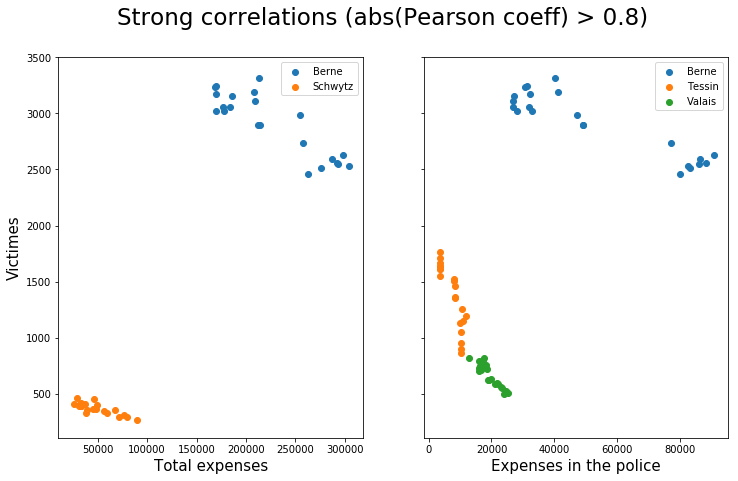

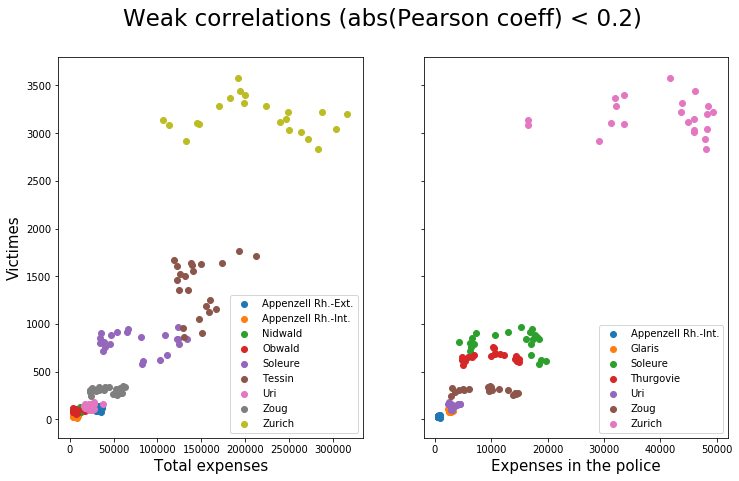

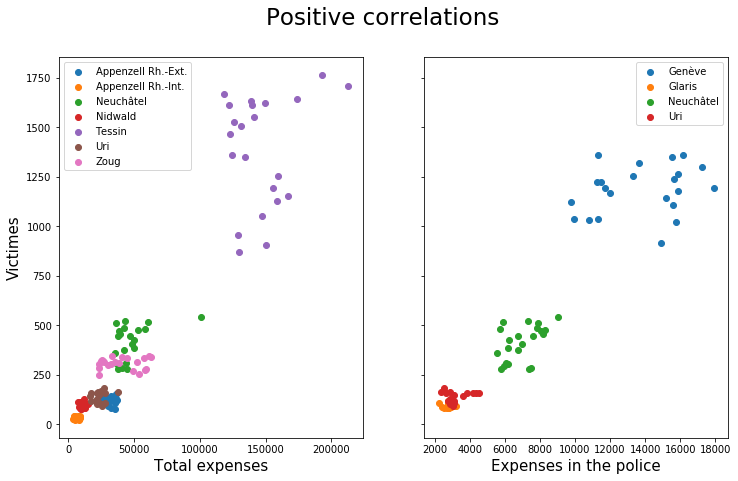

In [20]:
from scipy.stats.stats import pearsonr

threshold_of_significance = 0.8
threshold_of_unsignificance = 0.2

print_ = False

# Plot strong correlations
fig_strong, (ax1_strong, ax2_strong) = plt.subplots(1, 2, figsize=(12, 7), sharey=True)

# Total expenses in road services and police surveillance
if print_: 
    print('Correlations with the total expenses:')
for francais in frais.canton.unique():
    for deutsch in victimes_cantons.index:
        key = getKeysByValue(dict_cantons, deutsch)
        # if the canton has the same key in both set -> comparable
        if francais in dict_cantons[key]:
            victimes_temp = victimes_cantons.loc[deutsch][2:-2]
            frais_temp = frais[frais['canton']==francais]['Somme']
            pear = pearsonr(victimes_temp, frais_temp)[0]
            if abs(pear) > threshold_of_significance:
                if print_:
                    print('Strong:', francais, pearsonr(victimes_temp, frais_temp)[0])
                ax1_strong.scatter(frais_temp, victimes_temp, label=francais)
            
# Only police surveillance
if print_:
    print('Correlations with the expenses in the police services:')
for francais in frais.canton.unique():
    for deutsch in victimes_cantons.index:
        key = getKeysByValue(dict_cantons, deutsch)
        # if the canton has the same key in both set -> comparable
        if francais in dict_cantons[key]:
            victimes_temp = victimes_cantons.loc[deutsch][2:-2]
            frais_temp = frais[frais['canton']==francais]['Surveillance Policiere']
            pear = pearsonr(victimes_temp, frais_temp)[0]
            if abs(pear) > threshold_of_significance:
                if print_:
                    print('Strong:',francais, pearsonr(victimes_temp, frais_temp)[0])
                ax2_strong.scatter(frais_temp, victimes_temp, label=francais)

ax1_strong.set_xlabel('Total expenses', fontsize=15)
ax1_strong.set_ylabel('Victimes', fontsize=15)
ax1_strong.legend()
ax2_strong.set_xlabel('Expenses in the police', fontsize=15)
ax2_strong.legend()
plt.suptitle('Strong correlations (abs(Pearson coeff) > {})'.format(threshold_of_significance), fontsize=23)
plt.show()


# Plot weak correlations
fig_weak, (ax1_weak, ax2_weak) = plt.subplots(1, 2, figsize=(12, 7), sharey=True)

# Total expenses in road services and police surveillance
if print_:
    print('Correlations with the total expenses:')
for francais in frais.canton.unique():
    for deutsch in victimes_cantons.index:
        key = getKeysByValue(dict_cantons, deutsch)
        # if the canton has the same key in both set -> comparable
        if francais in dict_cantons[key]:
            victimes_temp = victimes_cantons.loc[deutsch][2:-2]
            frais_temp = frais[frais['canton']==francais]['Somme']
            pear = pearsonr(victimes_temp, frais_temp)[0]
            if abs(pear) < threshold_of_unsignificance:
                if print_:
                    print('Weak:', francais, pearsonr(victimes_temp, frais_temp)[0])
                ax1_weak.scatter(frais_temp, victimes_temp, label=francais)

# Only police surveillance
if print_:
    print('Correlations with the expenses in the police services:')
for francais in frais.canton.unique():
    for deutsch in victimes_cantons.index:
        key = getKeysByValue(dict_cantons, deutsch)
        # if the canton has the same key in both set -> comparable
        if francais in dict_cantons[key]:
            victimes_temp = victimes_cantons.loc[deutsch][2:-2]
            frais_temp = frais[frais['canton']==francais]['Surveillance Policiere']
            pear = pearsonr(victimes_temp, frais_temp)[0]
            if abs(pear) < threshold_of_unsignificance:
                if print_:
                    print('Weak:', francais, pearsonr(victimes_temp, frais_temp)[0])
                ax2_weak.scatter(frais_temp, victimes_temp, label=francais)


ax1_weak.set_xlabel('Total expenses', fontsize=15)
ax1_weak.set_ylabel('Victimes', fontsize=15)
ax1_weak.legend()
ax2_weak.set_xlabel('Expenses in the police', fontsize=15)
ax2_weak.legend()
plt.suptitle('Weak correlations (abs(Pearson coeff) < {})'.format(threshold_of_unsignificance), fontsize=23)
plt.show()


# Plot weak correlations
fig_pos, (ax1_pos, ax2_pos) = plt.subplots(1, 2, figsize=(12, 7), sharey=True)

# Total expenses in road services and police surveillance
if print_:
    print('Correlations with the total expenses:')
for francais in frais.canton.unique():
    for deutsch in victimes_cantons.index:
        key = getKeysByValue(dict_cantons, deutsch)
        # if the canton has the same key in both set -> comparable
        if francais in dict_cantons[key]:
            victimes_temp = victimes_cantons.loc[deutsch][2:-2]
            frais_temp = frais[frais['canton']==francais]['Somme']
            pear = pearsonr(victimes_temp, frais_temp)[0]
            if pear > 0:
                if print_:
                    print('Weak:', francais, pearsonr(victimes_temp, frais_temp)[0])
                ax1_pos.scatter(frais_temp, victimes_temp, label=francais)

# Only police surveillance
if print_:
    print('Correlations with the expenses in the police services:')
for francais in frais.canton.unique():
    for deutsch in victimes_cantons.index:
        key = getKeysByValue(dict_cantons, deutsch)
        # if the canton has the same key in both set -> comparable
        if francais in dict_cantons[key]:
            victimes_temp = victimes_cantons.loc[deutsch][2:-2]
            frais_temp = frais[frais['canton']==francais]['Surveillance Policiere']
            pear = pearsonr(victimes_temp, frais_temp)[0]
            if pear > 0:
                if print_:
                    print('Weak:', francais, pearsonr(victimes_temp, frais_temp)[0])
                ax2_pos.scatter(frais_temp, victimes_temp, label=francais)


ax1_pos.set_xlabel('Total expenses', fontsize=15)
ax1_pos.set_ylabel('Victimes', fontsize=15)
ax1_pos.legend()
ax2_pos.set_xlabel('Expenses in the police', fontsize=15)
ax2_pos.legend()
plt.suptitle('Positive correlations', fontsize=23)
plt.show()

En résumé:
Pas vraiment de corrélation, et ca fait sens haha

### Circumstances on a monthly basis

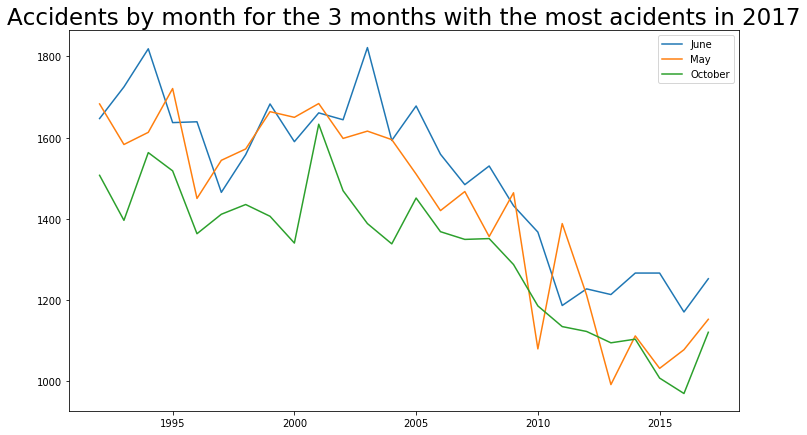

In [82]:

months_to_plot = 3

monthly_basis = df_Accident_circonstances.groupby('mois_index').sum().reset_index()
monthly_basis_temp = monthly_basis
monthly_basis_temp['temp'] = 1
monthly_basis_temp = monthly_basis_temp.groupby('temp').apply(lambda x: x.nlargest(months_to_plot,'2017'))

period = np.arange(1992,2018,1)

plt.figure(figsize=(12,7))
for month in monthly_basis_temp['mois_index']:
    plt.plot(period,monthly_basis.loc[month-1].values[6:-1], label=datetime.date(1900, int(month), 1).strftime('%B'))

plt.title('Accidents by month for the {} months with the most acidents in 2017'.format(months_to_plot), fontsize=23)
plt.legend()
plt.show()

Quite surprinsingly for me: more accidents during the summer ! -> do something about it, people are more careful in Winter

In [22]:
df_test = pd.DataFrame({'temp': [1]})
for year in period:
    df_test[str(year)] = np.sum(monthly_basis[str(year)].values)
monthly_basis = pd.concat([monthly_basis, df_test], sort=True, ignore_index=True)
for year in period:
    monthly_basis[str(year)]=monthly_basis[str(year)]/monthly_basis.loc[12, str(year)]
monthly_basis

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2015,2016,2017,circonstance_index,day_index,gravite_index,hours_index,mois_index,ruralite_index,temp
0,0.059280,0.067360,0.063847,0.061321,0.060228,0.049461,0.071270,0.065002,0.061560,0.067039,...,0.061736,0.068485,0.055130,70560.0,80640.0,6370560.0,544320.0,1.0,221760.0,1
1,0.061341,0.053396,0.054944,0.065762,0.057446,0.059669,0.060144,0.048889,0.065660,0.059404,...,0.056710,0.062442,0.058533,70560.0,80640.0,6370560.0,544320.0,2.0,221760.0,1
2,0.072979,0.073019,0.077905,0.077564,0.073295,0.072459,0.074957,0.075439,0.077901,0.078644,...,0.081421,0.073017,0.089416,70560.0,80640.0,6370560.0,544320.0,3.0,221760.0,1
3,0.071403,0.080524,0.075328,0.074218,0.081576,0.086510,0.080933,0.074646,0.077010,0.073112,...,0.086363,0.079731,0.080483,70560.0,80640.0,6370560.0,544320.0,4.0,221760.0,1
4,0.102012,0.097379,0.094482,0.104696,0.093803,0.097284,0.099943,0.101562,0.098045,0.101251,...,0.086363,0.090390,0.098009,70560.0,80640.0,6370560.0,544320.0,5.0,221760.0,1
5,0.099830,0.106115,0.106549,0.099586,0.106029,0.092307,0.099053,0.102722,0.094480,0.099868,...,0.106048,0.098196,0.106517,70560.0,80640.0,6370560.0,544320.0,6.0,221760.0,1
6,0.092981,0.088829,0.089328,0.095206,0.098072,0.092370,0.080170,0.093994,0.083665,0.088324,...,0.093148,0.090978,0.081079,70560.0,80640.0,6370560.0,544320.0,7.0,221760.0,1
7,0.098679,0.098118,0.090440,0.087176,0.093479,0.102199,0.095492,0.086426,0.095312,0.097703,...,0.089378,0.095342,0.089501,70560.0,80640.0,6370560.0,544320.0,8.0,221760.0,1
8,0.092254,0.091166,0.086223,0.092408,0.087463,0.097725,0.094857,0.104370,0.098877,0.083454,...,0.093064,0.103231,0.089501,70560.0,80640.0,6370560.0,544320.0,9.0,221760.0,1
9,0.091344,0.085876,0.091553,0.092347,0.088174,0.088904,0.091233,0.085815,0.079624,0.098184,...,0.084352,0.081326,0.095287,70560.0,80640.0,6370560.0,544320.0,10.0,221760.0,1


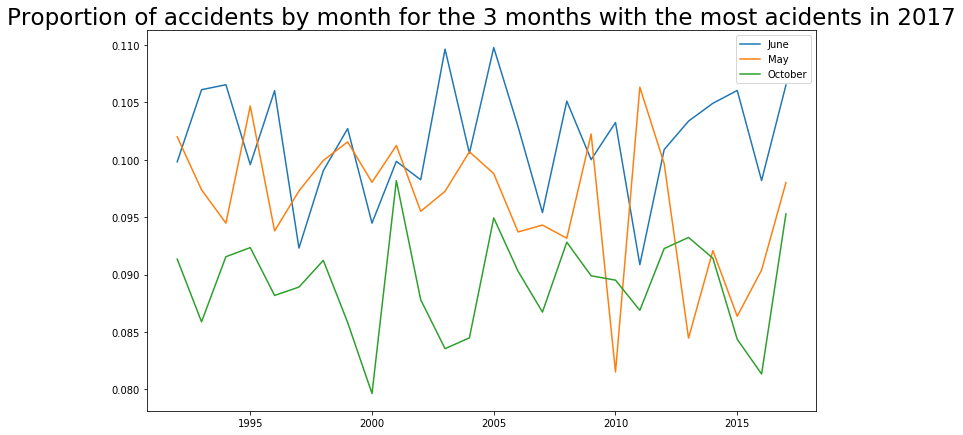

In [23]:
plt.figure(figsize=(12,7))
for month in monthly_basis_temp['mois_index']:
    plt.plot(period,monthly_basis.loc[month-1].values[:26], label=datetime.date(1900, int(month), 1).strftime('%B'))

plt.title('Proportion of accidents by month for the {} months with the most acidents in 2017'.format(months_to_plot), fontsize=23)
plt.legend()
plt.show()

We have the same results in proportional terms !

2010 May weird 

some weird stuff haha

But in general interesting: less in Winter and in full Summer, probably due to the vacations.

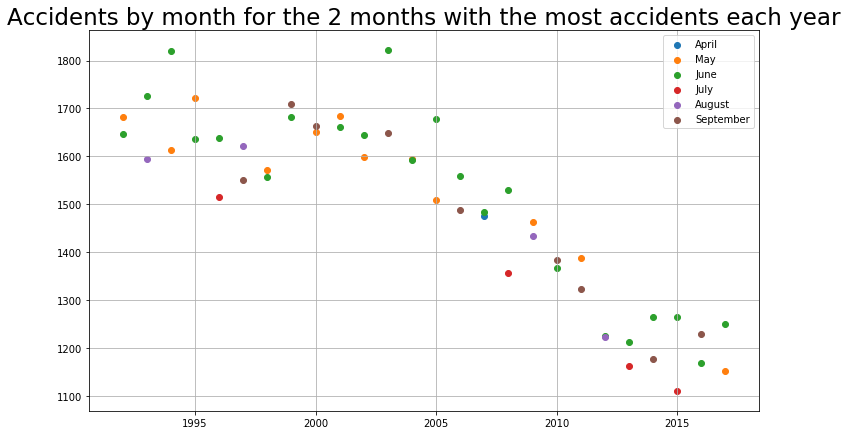

In [84]:
months_to_plot = 2

monthly_basis = df_Accident_circonstances.groupby('mois_index').sum().reset_index().apply(lambda x: x.nlargest(months_to_plot))
period = np.arange(1992,2018,1)

plt.figure(figsize=(12,7))

for month in range(monthly_basis.shape[0]):
    to_plot = monthly_basis.iloc[month].values[6:]
    if len(to_plot[np.isnan(to_plot)==False]) != 0:
        plt.scatter(period,monthly_basis.iloc[month].values[6:], label=datetime.date(1900, int(monthly_basis.index[month]+1), 1).strftime('%B'))

plt.title('Accidents by month for the {} months with the most accidents each year'.format(months_to_plot), fontsize=23)
plt.legend()
plt.grid()
plt.show()

### Circumstances

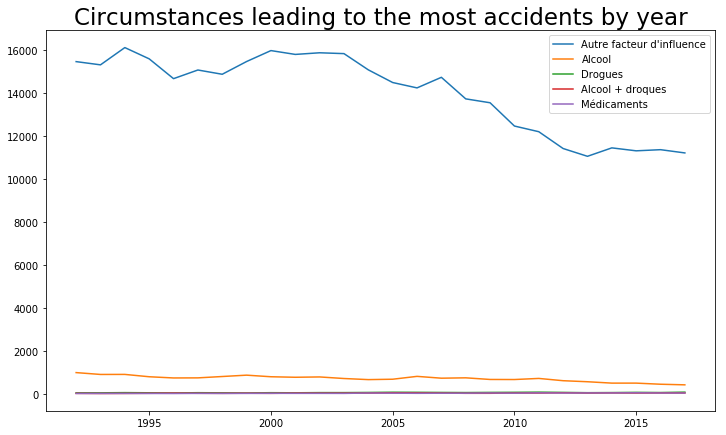

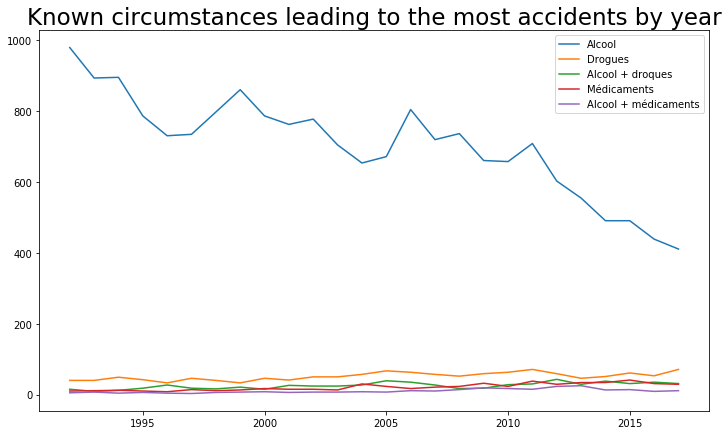

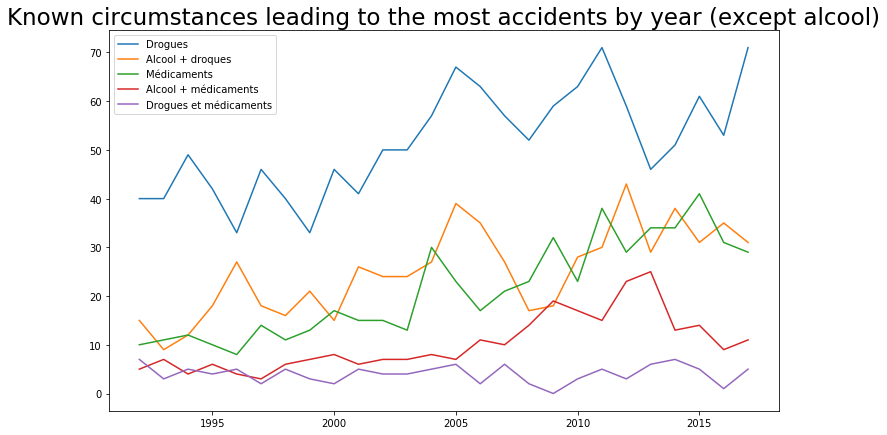

In [25]:
df_Accident_circonstances.circonstance.unique()

months_to_plot = 5

monthly_basis = df_Accident_circonstances.groupby('circonstance').sum().reset_index()
monthly_basis_temp = monthly_basis
monthly_basis_temp['temp'] = 1
monthly_basis_temp = monthly_basis_temp.groupby('temp').apply(lambda x: x.nlargest(months_to_plot,'2017'))

period = np.arange(1992,2018,1)

plt.figure(figsize=(12,7))
for circ in monthly_basis_temp['circonstance']:
    plt.plot(period, monthly_basis[monthly_basis['circonstance']==circ].values[0][7:-1], label=circ)

plt.title('Circumstances leading to the most accidents by year', fontsize=23)
plt.legend()
plt.show()


monthly_basis = df_Accident_circonstances.groupby('circonstance').sum().reset_index()
monthly_basis_temp = monthly_basis
monthly_basis_temp['temp'] = 1
monthly_basis_temp = monthly_basis_temp.groupby('temp').apply(lambda x: x.nlargest(months_to_plot+1,'2017'))

period = np.arange(1992,2018,1)

plt.figure(figsize=(12,7))
for circ in monthly_basis_temp['circonstance']:
    if circ != "Autre facteur d'influence":
        plt.plot(period, monthly_basis[monthly_basis['circonstance']==circ].values[0][7:-1], label=circ)

plt.title('Known circumstances leading to the most accidents by year', fontsize=23)
plt.legend()
plt.show()


monthly_basis = df_Accident_circonstances.groupby('circonstance').sum().reset_index()
monthly_basis_temp = monthly_basis
monthly_basis_temp['temp'] = 1
monthly_basis_temp = monthly_basis_temp.groupby('temp').apply(lambda x: x.nlargest(months_to_plot+2,'2017'))

period = np.arange(1992,2018,1)

plt.figure(figsize=(12,7))
for circ in monthly_basis_temp['circonstance']:
    if (circ != "Autre facteur d'influence") & (circ != "Alcool"):
        plt.plot(period, monthly_basis[monthly_basis['circonstance']==circ].values[0][7:-1], label=circ)

plt.title('Known circumstances leading to the most accidents by year (except alcool)', fontsize=23)
plt.legend()
plt.show()

Interesting: accidents linked to alcool alone are clearly decreasing but the ones linked to others known circumstances are more on an increasing trend. However, it must be dealt with carefully as a vast majority of the accident are categorized as "other circumstance". But the result is still accurate concerning the accidents linked to alcool, drugs and medication, the ones interesting the government.

### Correlation between new roads and anual victims

Text(0.5,1,'Victimes sur autoroute')

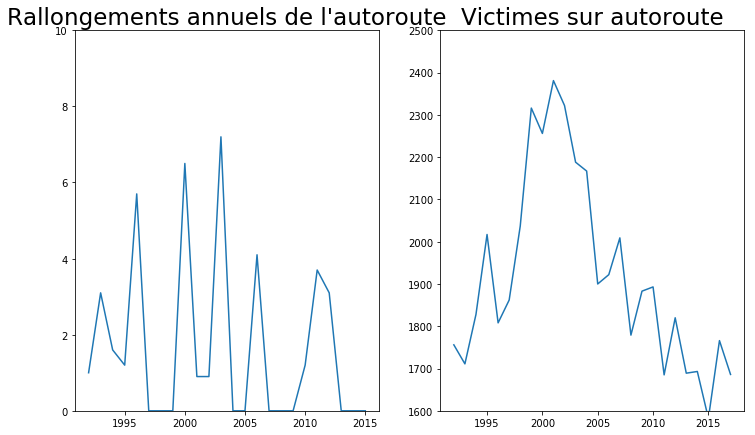

In [26]:
longueur = df_Longueur_routes
longueurBerne = longueur[longueur.canton == 'Berne']
longueurBerne

new_road = []
for i in range(len(longueurBerne['Routes nationales'])-1):
    l0 = longueurBerne.iat[i, 3]
    l1 = longueurBerne.iat[i+1, 3]
    new_road.append(abs(l1-l0))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=False)
ax1.plot(np.arange(1992,2016,1),new_road, label = "Rallongements annuels de l'autoroute")
ax1.set_ylim(0,10)
ax1.set_title("Rallongements annuels de l'autoroute", fontsize=23)

ax2.plot(np.arange(1992,2018,1),victimes_ruralite.iloc[2], label = 'Nb accidents')
ax2.set_ylim(1600,2500)
ax2.set_title('Victimes sur autoroute', fontsize=23)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.show()



In [27]:
xRd = new_road
yVictimes = victimes_ruralite.iloc[2, 1:25]
cor,p = stats.pearsonr(xRd, yVictimes)
cor, p
# print(xRd, yVictimes)

(0.24013746227548802, 0.25836530792115564)

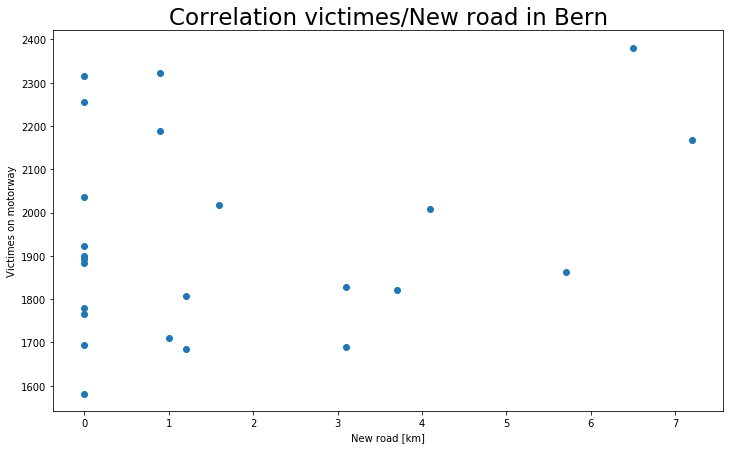

In [28]:
plt.figure(figsize=(12,7))
plt.scatter(xRd,yVictimes)
plt.title('Correlation victimes/New road in Bern', fontsize=23)
plt.xlabel('New road [km]')
plt.ylabel('Victimes on motorway')
plt.show()